## Exercise Sheet 4:


### Exercise 1

Consider measuring the length of a certain object. Since it is difficult to measure it exactly, there
have been many attempts in measuring it. Assume that the correct length is l∗ and the measurements
l(1), l(2), ..., l(n) that have been obtained are the true length plus a noise term, i.e.,
        $l(i) = l∗+ε$

#### Exercise 1.1
Assume that the noise term ε follows a Gaussian distribution with mean 0 and variance 1,
i.e., ε ∼N(0,1). Determine the maximum likelihood estimator (MLE) for this case. Provide
the derivation of it and also provide a closed form solution for it.

![Solution 1.1](./ex_1_1.png "Solution 1.1")

The Maximum Likelihood Estimator is the mean of the observations l(1), l(2), ..., l(n)


#### Exercise 1.2
Assume now that the noise term ε follows a Laplacian distribution Laplace(μ,b) with location
parameter μ = 0 and scale parameter b = 1. The probability density function of the
Laplacian distribution Laplace(μ,b) is defined as
$\frac{1}{2 b} \exp \left(-\frac{|x-\mu|}{b}\right)$
Again, compute the maximum likelihood estimator (MLE) for this case. Provide the derivation
of it and also provide a closed for solution for it.

![Solution 1.2](./ex_1_2.png "Solution 1.2")

The Maximum Likelihood Estimator is the median of the observations l(1), l(2), ..., l(n)


Which of the two estimators is more robust against outliers?

A: Generally the median is more robust against outliers than the mean is. This can also be seen in the closed form solution. For the Gaussian distribution the distance for each data point to the true value is squared. This results in giving data points far away from the ground truth more weight in opposition to the norm for the Laplace distribution

### Exercise 2
Consider the following regression problem: You are given 40 data points each having 200 features
and a real-valued response for each data point. Find a good linear regressor that explains the data
well and at the same time is fairly sparse. You encounter such problems usually when dealing with
gene expression data where you have few patients but many genes that might cause an illness.
Come up with a good solution for this problem and write some code to solve it. You are now allowed
to use scikit-learn. You will find a training and a test data set dataset_sparse_train.npy
and dataset_sparse_test.npy. Report your best regressor. What does best mean here for you?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# load in the data
def load_data(name, m = None, rng = None):
    data = np.load(name)
    x = data[:,:-1]
    y = data[:,-1]

    if not m is None:
        if rng is None: rng = np.default_rng(seed = 66)
        idx = rng.choice(m, size = len(x), replace = False)
        x = x[idx]
        y = y[idx]

    return (x, y)

x_train, y_train = load_data("dataset_sparse_test.npy")
x_test, y_test = load_data("dataset_sparse_train.npy")

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
alpha_range = [1e-9, 0.2]
alphas = np.linspace(*alpha_range, 1000)
maes = []
coeffs = []
# define model
for alpha in alphas:
    model = Lasso(alpha=alpha)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    coeffs.append(sum(model.fit(x_train, y_train).coef_ != 0))
    # force scores to be positive
    scores = np.abs(scores)
    m_score = np.mean(scores)
    maes.append(m_score)

C:\Users\mhuep\.conda\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.475e-03, tolerance: 7.905e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\mhuep\.conda\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e-02, tolerance: 7.905e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\mhuep\.conda\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

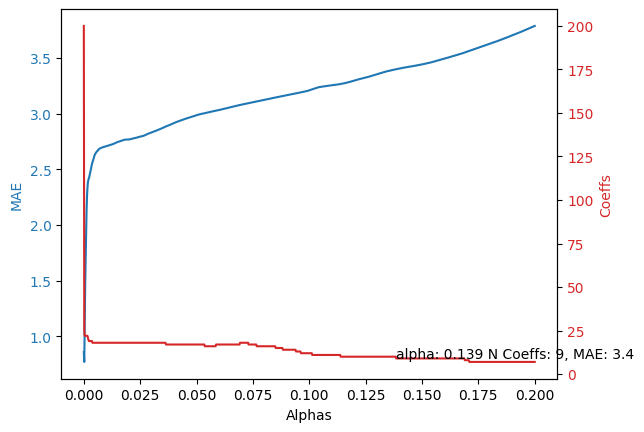

In [135]:
target_n_features = 10
best_fit = np.where(np.asarray(coeffs) < target_n_features)[0][0]
fig, ax1 = plt.subplots()

# Plot the first line on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Alphas')
ax1.set_ylabel('MAE', color=color)
ax1.plot(alphas, maes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis and plot the second line on it
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Coeffs', color=color)
ax2.plot(alphas, coeffs, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.annotate(f"alpha: {round(alphas[best_fit], 3)} N Coeffs: {coeffs[best_fit]}, MAE: {round(maes[best_fit], 2)}", (alphas[best_fit], coeffs[best_fit]))
plt.show()

In [136]:
alpha = alphas[best_fit]
model = Lasso(alpha=alpha)
# fit model
model = model.fit(x_train, y_train)

In [137]:
f"Number of non-zero features: {sum(model.coef_ != 0)}"

'Number of non-zero features: 9'

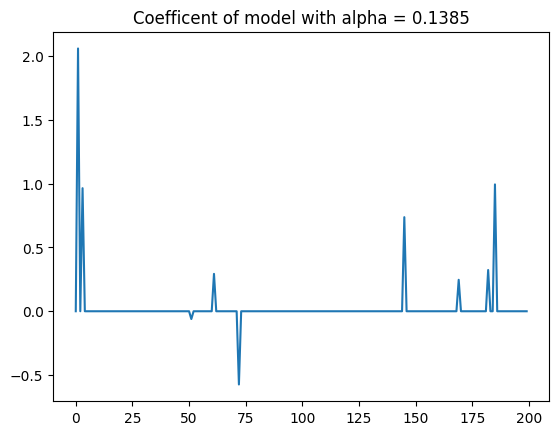

In [138]:
import matplotlib.pyplot as plt
plt.title(f"Coefficent of model with alpha = {round(alpha, 4)}")
plt.plot(model.coef_)
plt.show()

In [139]:
from sklearn.metrics import mean_squared_error
# Calculate mean squared error
mse = mean_squared_error(y_train, model.predict(x_train))
mse_test = mean_squared_error(y_test, model.predict(x_test))

print("Mean Squared Error:", mse)
print("Mean Squared Error Test:", mse_test)

Mean Squared Error: 0.9048755377182827
Mean Squared Error Test: 3.673117403303563


Best in this case meanst that the number of features are still interpretable ( > 10) and the test performance is somewhat exceptable